<a href="https://colab.research.google.com/github/Baeltor/PCD/blob/prog/NotebooksMLII/Redes_convolucionales_introducci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcoteran/deeplearning/blob/master/notebooks/3.3_deeplearning_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab" title="Abrir y ejecutar en Google Colaboratory"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marcoteran/deeplearning/blob/master/notebooks/3.3_deeplearning_cnn.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Abrir en Kaggle" title="Abrir y ejecutar en Kaggle"/></a>
  </td>
</table>


# Redes Neuronales Convolucionales
## Aprendizaje de máquina II

**Sergio David Díaz Veru**
___

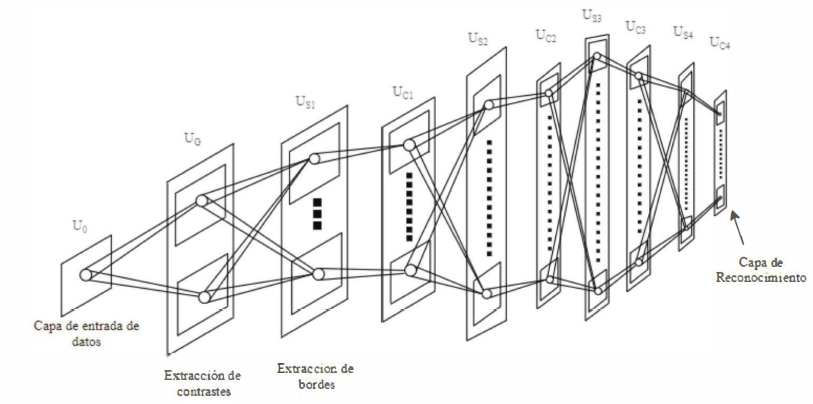

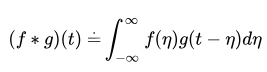

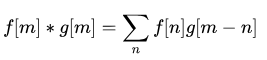

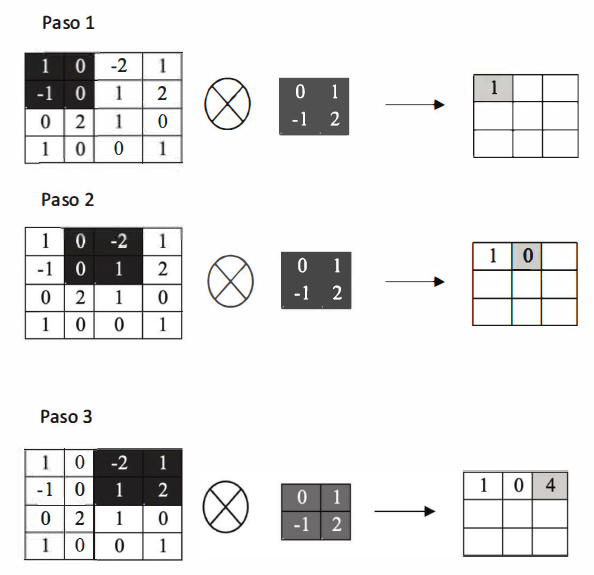

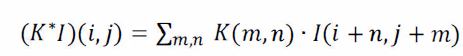

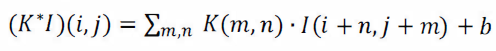

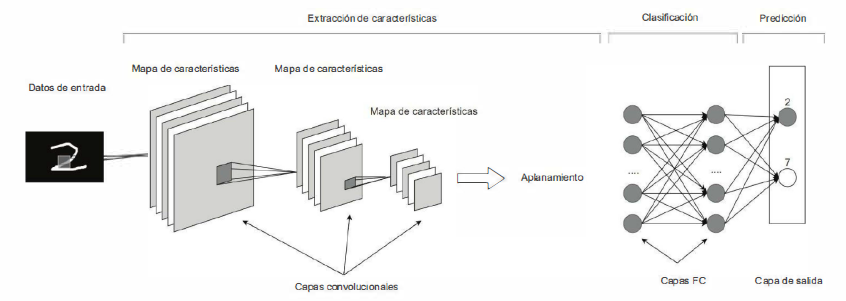

### Importar librerías importantes

Empezamos con las importaciones estándar:

In [1]:
import warnings
warnings.filterwarnings('ignore')
#import mlutils
import numpy as np
import pandas as pd
import importlib
#importlib.reload(mlutils)
#reload(mlutils) Python2

# Visualizations
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()  # for plot styling
from IPython.display import Image
from IPython.core.display import HTML
%matplotlib inline

# Machine learning
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from IPython.display import HTML
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy.stats import mode
from sklearn.metrics import pairwise_distances_argmin

In [2]:
# Deep learning
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.17.0


# ¿Qué son las Redes convolucionales?

Una **red neuronal convolucional** es un tipo de red neuronal artificial donde las neuronas corresponden a campos receptivos de una manera muy similar a las neuronas en la corteza visual primaria (V1) de un cerebro biológico. Este tipo de red es una variación de un perceptron multicapa, sin embargo, debido a que su aplicación es realizada en matrices bidimensionales, son muy efectivas para tareas de visión artificial, como en la clasificación y segmentación de imágenes, entre otras aplicaciones.

![CNN](https://pedrofrodenas.github.io/assets/images/net.png)

## Ejemplo 1: clasificación de digitos MNIST

Tutorial de Deep Learning con Keras para clasificar la base de datos MNIST.

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Reshape
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

### Carga de la base de datos MNIST
Nota que al ser una base de datos tan popular ya existen scripts para descargar, descomprimir y formar el conjunto de datos de entreno y de test.
En un caso real, hay que programar las funciones que se encarguen de la descarga, la importación, la unificación de las imagenes para que todas tengan el mismo tamaño, etc… Este paso normalmente es de los que ocupan más tiempo.

Los datos del MNIST están disponibles directamente en el API de los conjuntos de datos de tf.keras. Lo cargas así:

In [4]:
# Para descargar la base de datos MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Tamaño de:")
print (train_images.shape)
print (train_labels.shape)

print("Tamaño de:")
print("- Set de entranamiento:\t{}".format(len(train_images)))
print("- Set de testeo:\t\t{}".format(len(test_images)))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Tamaño de:
(60000, 28, 28)
(60000,)
Tamaño de:
- Set de entranamiento:	60000
- Set de testeo:		10000


El conjunto de datos MNIST ahora se ha cargado y consiste en 70,000 imágenes y números de clase para las imágenes. El conjunto de datos se divide en 3 subconjuntos. Uno se utiliza para entrenar la red, otro para testearla y otro para validar que el entreno se este realizando correctamente.

MNIST contiene imagenes de números manuscritos que van desde el 0 hasta el 9, por tanto tenemos 10 clases a clasificar. Las imagenes se almacenan en un vector y las etiquetas en otro.
Las etiquetas sirven para decirle a la red que número es una determinada imagen a la hora de entrenar. En la fase de test sirven para comprobar si la red neuronal ha clasificado bien un determinado número.

9


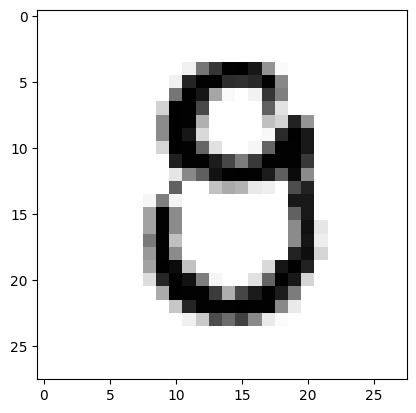

In [12]:
picnumber=80
plt.imshow(train_images[picnumber], cmap=plt.cm.binary)
# Ver la etiqueta
print(train_labels[picnumber])

#### Preprocesado de datos de entrada

In [13]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Cambio a variables categoricas

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28, 1)
(60000, 10)


In [14]:
print(test_labels[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Construcción de una Red neuronal convolucional

Keras dispone de dos modos para construir una arquitectura de red, el sequential mode y el functional mode. En este tutorial usaremos el sequential mode que es el más simple.

In [18]:
28*28

784

En el sequential mode se añaden capas de neuronas para formar la arquitectura neuronal. En la primera capa se deben especificar las dimensiones de los datos de entrada.
En nuestro caso las imagenes se encuentran en un vector de una fila y 28*28 columnas. Una vez introducido el vector a la red hay que modificarlo para que se realice la convolución correctamente. Transformando el vector de [1, 784] a una matriz de [28, 28] que es la imagen que se puede visualizar.

In [19]:
# Llamamos al constructor del modelo sequential
model = Sequential()

# Capa convolucional con funcion de activacion ReLU y max-pooling.
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

Comprobar la estructura de la red
Para comprobar la estructura de la red y el número de parámetros entrenables usamos la siguiente sentencia.

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 832 (3.25 KB)

 Trainable params: 832 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

Definición de una red convolucional de más capas

In [24]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,096 (203.50 KB)

 Trainable params: 52,096 (203.50 KB)

 Non-trainable params: 0 (0.00 B)

Ultima capa de la red, del tipo Dense. Nota que hay ``num_classes=10`` neuronas en esta capa. La clasificacion
se hara comprobando que neurona obtiene a la salida un numero mayor.

In [25]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

Comprobar la estructura de la red

In [26]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,346 (243.54 KB)

 Trainable params: 62,346 (243.54 KB)

 Non-trainable params: 0 (0.00 B)

### Compilación del modelo

Se ha definido la estructura de la red neuronal convolucional, ahora hay que añadir el tipo de optimizador y las métricas que se van a utilizar.

Los modelos de Deep Learning generalmente son entrenados por un optimizador de descenso de gradiente estocástico. Hay muchas variaciones de descendencia de gradiente estocástica: ``Adam``, ``RMSProp``, ``Adagrad``, etc. Todas permiten establecer el learning rate.
Cuando más pequeño sea este parámetro más tardará la red en entrenar y más precisión se obtendrá para el conjunto de datos de entreno. Hay que elegir un learning rate optimo para cada problema de Deep Learning. Si es muy pequeño la red aprenderá del ruido que hay en todas las imágenes y no de la función subyacente que relaciona las entradas y las salidas.

Cuando se da este problema se obtiene una gran precisión para el conjunto de datos de entreno y disminuye para el de test porque la red se ha especializado en reconocer el conjunto de datos para el que ha sido entrenada y ha perdido la habilidad de generalizar para otros casos. Este problema se conoce como overfitting

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Entrenamiento de la red

Ahora que ya se ha definido la estructura de red, el optimizador, learning rate y metricas ya se puede entrenar la red.

* Mientras se va entrenando la red aparece la cantidad de épocas o epoch completadas. Una época o epoch es cuando la red ha visto todas las imagenes que contiene la base de datos. El número de epocas será otro hiperparámetro a elegir.
* No es posible entrenar la red pasandole todas las imágenes a la vez porque la memoria RAM es un recurso limitado.
* Por tanto se le pasan en grupos de un determinado número de imagenes conocido como batch size, cuento más grande sea este parámetro menos se tardará en completar el entreno. El batch size estrá limitado por la memoria RAM del computador.

In [28]:
model.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 56s 92ms/step - accuracy: 0.5993 - loss: 1.5654
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.9161 - loss: 0.2890
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 85s 97ms/step - accuracy: 0.9419 - loss: 0.2003
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 78s 91ms/step - accuracy: 0.9525 - loss: 0.1610
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 84s 95ms/step - accuracy: 0.9625 - loss: 0.1312


#### Evaluación de la red
Para ver si la red ha aprendido a clasificar bien los números manuscritos hay que comprobar la precisión que obtiene en el conjunto de datos de test. Para este conjunto no ha sido entrenada la red.

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9633 - loss: 0.1216
Test accuracy: 0.9688000082969666


El parámtro ``test_acc`` es la precisión que ha obtenido la red para el conjunto de entreno.
Ahora hay que comprobar si clasifica bien las imágenes del conjunto de test. Estas imágenes aún no las ha visto la red y no tiene información de ellas.

#### Guardar el modelo
Es útil gurdar un modelo que ha sido entrenado satisfactoriamente para su posterior uso. De esta manera no hay que entrenar de nuevo la red y se pueden realizar prediciones con el modelo guardado.

* **NOTA:** Será necesario instalar el paquete h5py para poder guardar modelos.

In [30]:
# Definir la carpeta donde se guarda el modelo y su nombre.
# En este caso se guarda en el mismo directorio que contiene este script
nombre_model = 'modelo.h5'

# Guardamos el modelo y todos los pesos entrenados
model.save(nombre_model)

___

## Ejemplo 2: Conjunto de datos Fashion-MNIST

Echemos un vistazo a un escenario en el que podemos reconocer diferentes prendas de vestir, entrenadas a partir de un conjunto de datos que contiene 10 tipos diferentes.

![Datos Fashion-MNIST](https://www.researchgate.net/profile/Greeshma_K_V/publication/340299295/figure/fig1/AS:875121904476163@1585656729996/Fashion-MNIST-Dataset-Images-with-Labels-and-Description-II-LITERATURE-REVIEW-In-image.jpg)

### Carga de datos

Los datos del MNIST de la moda están disponibles directamente en el API de los conjuntos de datos de tf.keras. Lo cargas así:

In [31]:
fashion_mnist = keras.datasets.fashion_mnist

Llamar a ``load_data`` en el objeto le dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

In [32]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [33]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

¿Cómo son estos valores? Imprimamos una imagen de entrenamiento, y una etiqueta de entrenamiento para ver... Experimentemos con diferentes índices en la matriz.

9


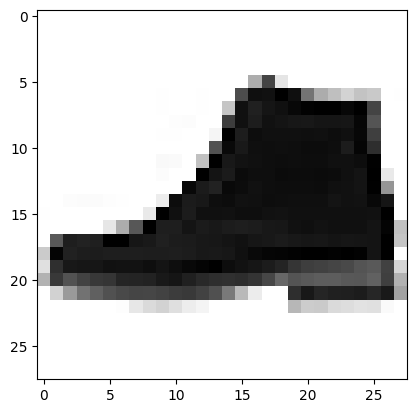

In [34]:
picnumber=42
plt.imshow(train_images[picnumber], cmap=plt.cm.binary)
# Ver la etiqueta
print(train_labels[picnumber])

In [35]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

### Modelo 1: modelo de base basado en el mismo modelo que el usado para el conjunto datos digits MNIST

In [36]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,346 (243.54 KB)

 Trainable params: 62,346 (243.54 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.7735 - loss: 0.6432
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.8812 - loss: 0.3279
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9013 - loss: 0.2740
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9116 - loss: 0.2448
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9219 - loss: 0.2178
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8946 - loss: 0.3075
Test accuracy: 0.8934000134468079


In [40]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,040 (730.63 KB)

 Trainable params: 62,346 (243.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 124,694 (487.09 KB)

In [39]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8946 - loss: 0.3075
Test accuracy: 0.8934000134468079


In [41]:
predictions[5]

array([2.7570071e-05, 9.9983454e-01, 3.2242608e-07, 9.8439727e-05,
       3.4071159e-05, 2.2705299e-08, 1.3539361e-06, 4.7052499e-13,
       3.6385222e-06, 1.7215686e-12], dtype=float32)

In [42]:
test_labels[5]

1

In [44]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('black')

In [45]:
train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))

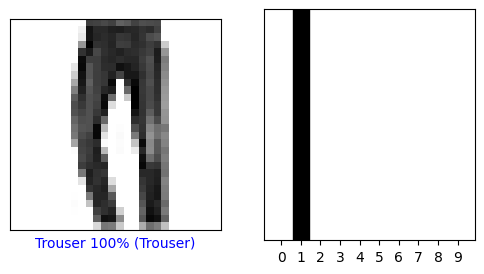

In [46]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

### Mejoramiento de los modelos

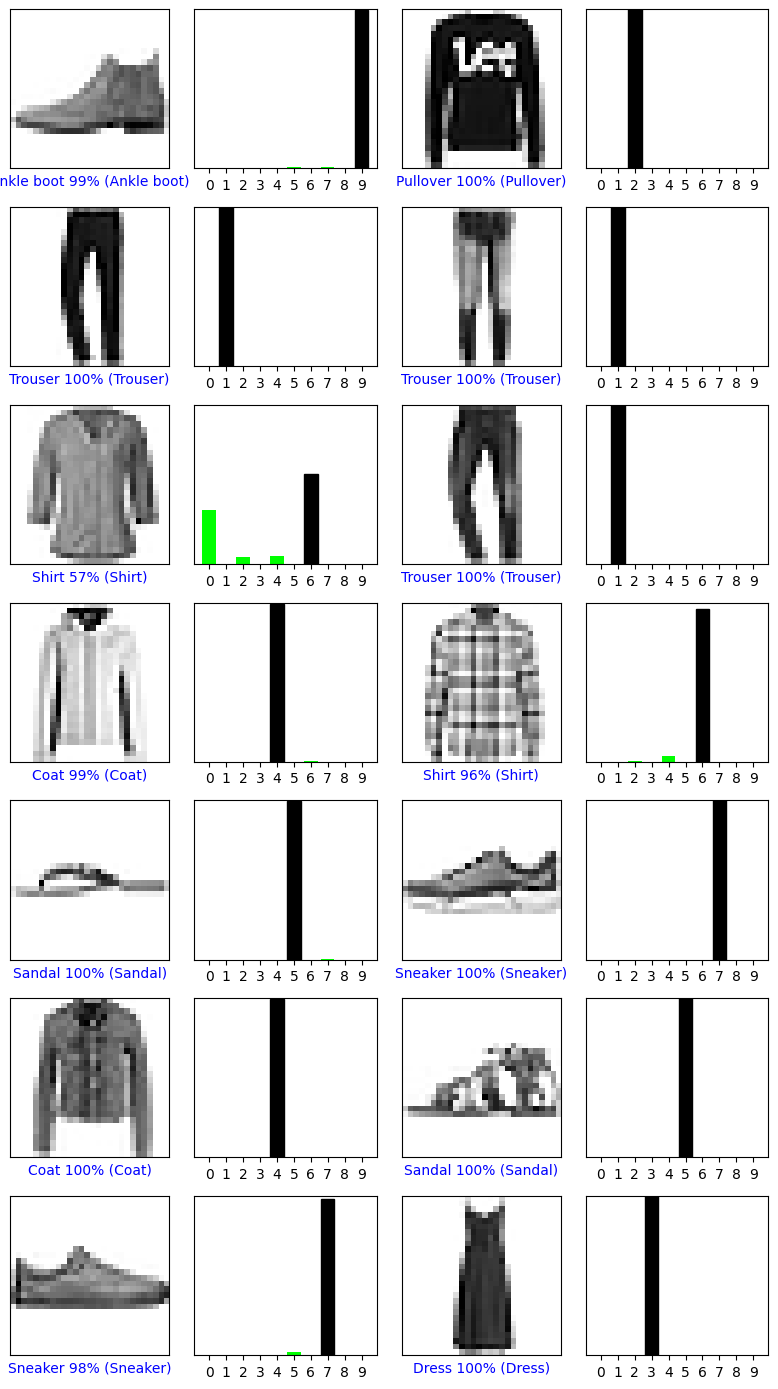

In [47]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

### Modelo 2: Duplicando las neuronas de modelo base y añadiendo una capa densa de 64 neuronas

In [48]:
model = Sequential()

model.add(Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
 628/1875 ━━━━━━━━━━━━━━━━━━━━ 2:17 110ms/step - accuracy: 0.4730 - loss: 1.5159

### Modelo 3: modelo 3 cambiando al optimizador 'adam'

In [ ]:
model = Sequential()

model.add(Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

### Modelo 4: Buscando un modelo más complejo que usa capas BatchNormalization y Dropout

Crearemos una función que permita recrear una red convolucional

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization


def make_model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', input_shape=(28,28,1)))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

In [ ]:
model = make_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

### Modelo 5: Modelo anterior añadiendo más epochs (10 epochs)

In [ ]:
model = make_model()


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

### Modelo 6: Modelo anterior añadiendo más epochs (30 epochs)

In [ ]:
model = make_model()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=30)
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

### Modelo 7: Modelo anterior añadiendo más epochs (30 epochs) y diferentes hiperparámetros al optimizador Adam

In [ ]:
model = make_model()

optimizer = tf.keras.optimizers.Adam (lr=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

model.fit(train_images, train_labels, epochs=30, callbacks=[reduce_lr])

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

In [ ]:
predictions = model.predict(test_images)

train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))


num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

## Referencias generales

- [Redes neuronales convolucionales](https://es.wikipedia.org/wiki/Redes_neuronales_convolucionales)
- [Convolutional Neural Network (CNN) with TensorFlow](https://www.tensorflow.org/tutorials/images/cnn)

___
¡Todo bien! ¡Es todo por hoy! 😀